In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

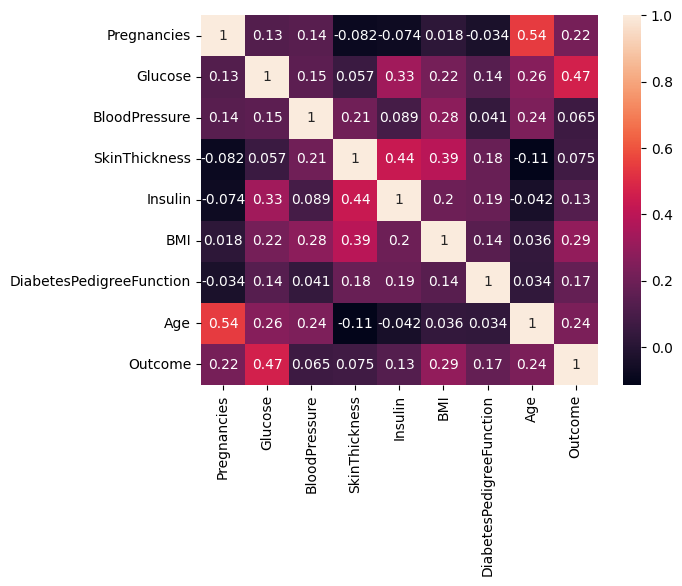

In [ ]:
 sns.heatmap(df.corr(),annot=True)

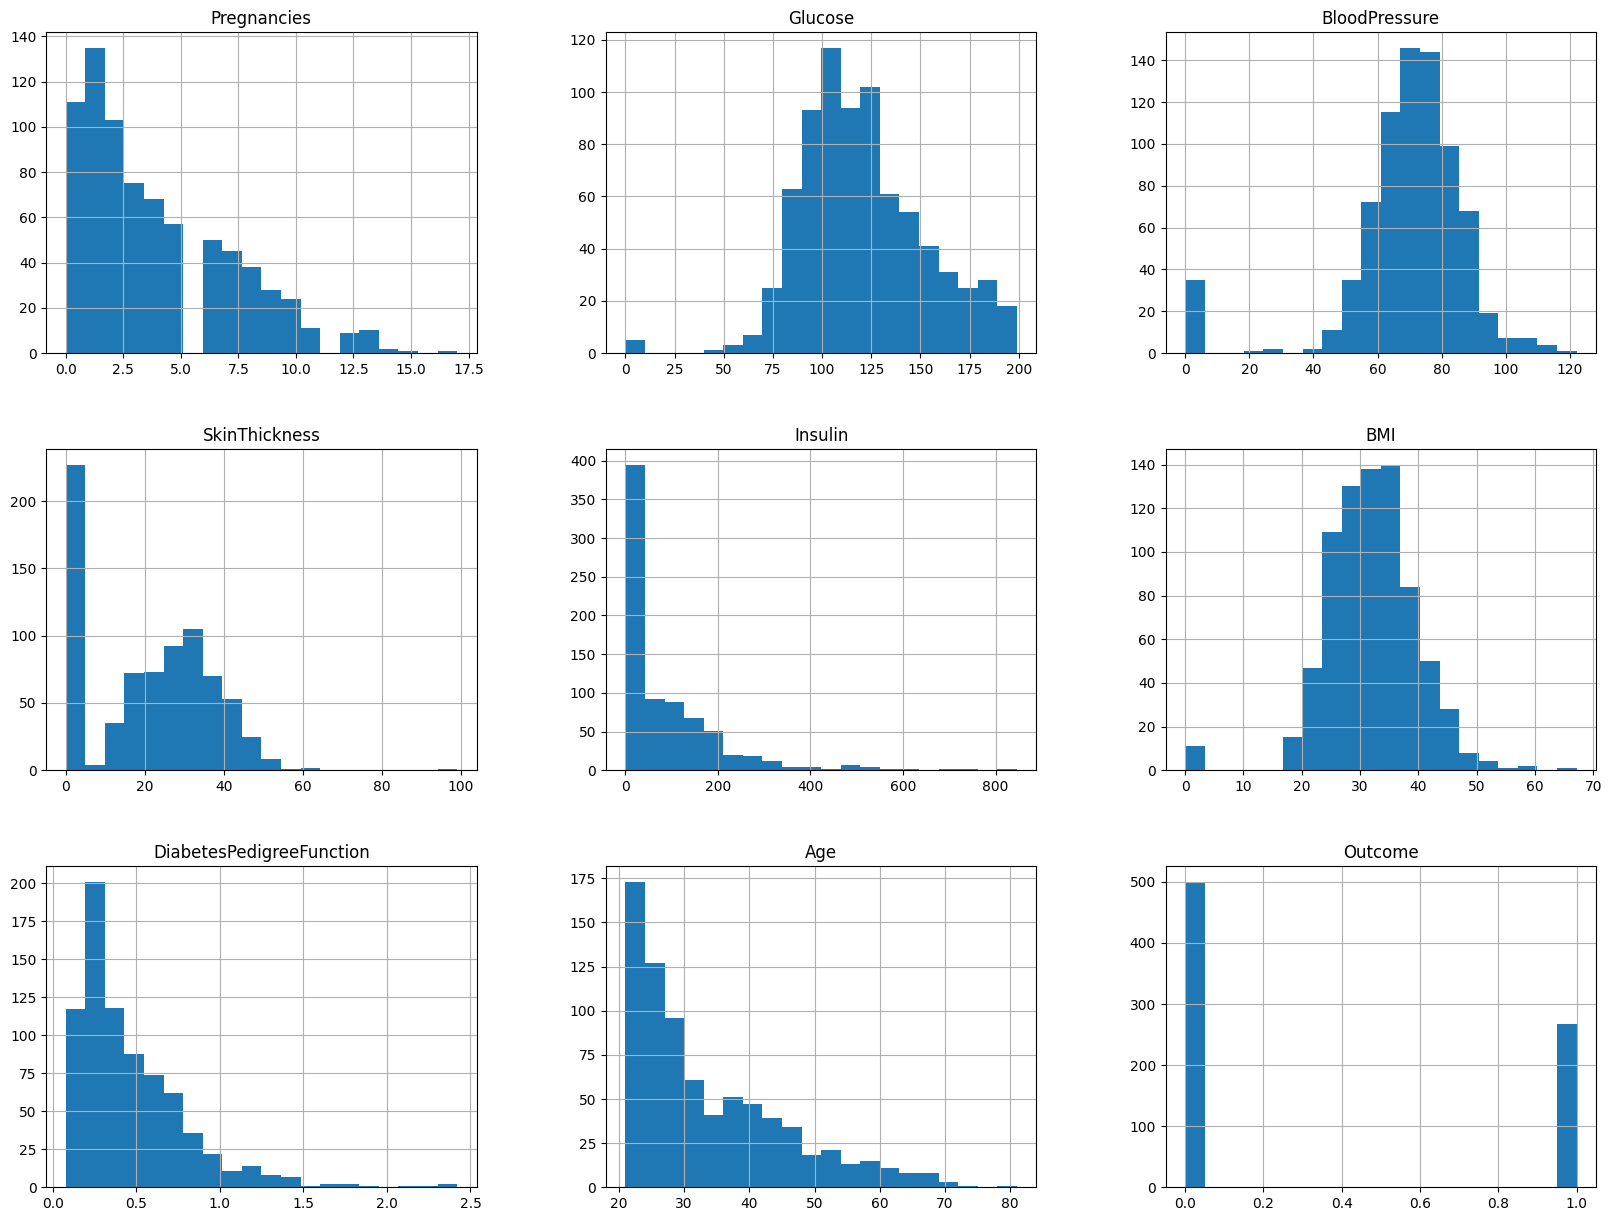

In [ ]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

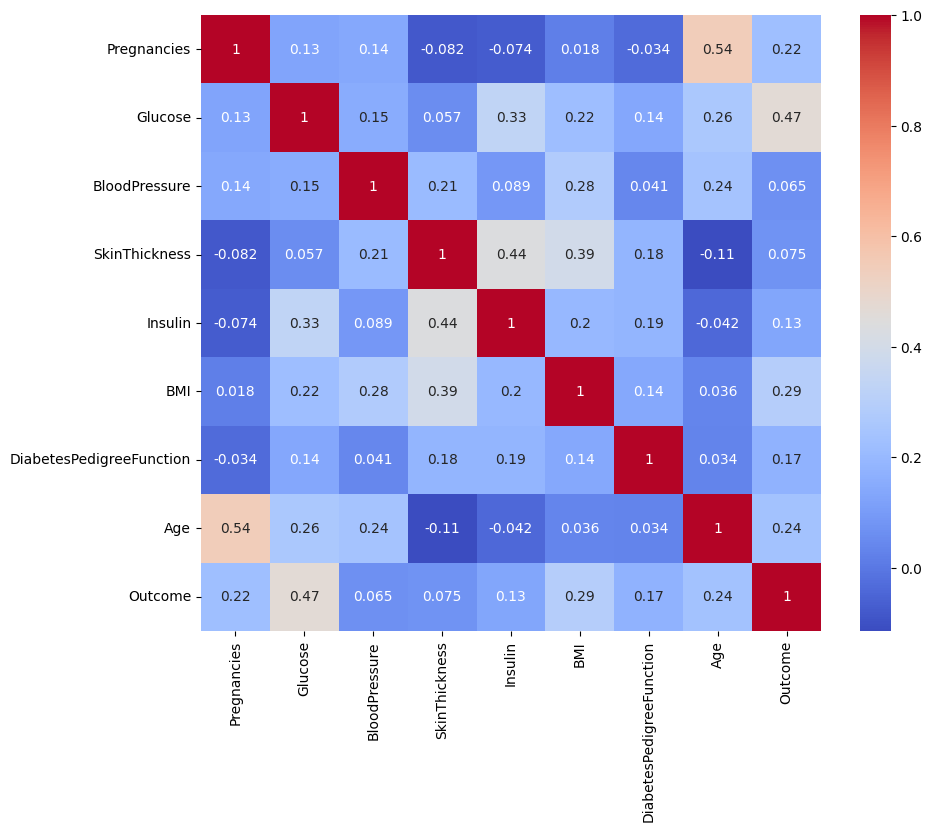

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
#spliting the data into testing & training

X=df.drop(columns=["Outcome"], axis=1)
y=df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Define the parameter grid for RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, 40, 50, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV with the RandomForestClassifier
gridsearch = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

# Fit the model to the training data
gridsearch.fit(X_train, y_train)

# Get the best estimator
best_model = gridsearch.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Accuracy on test set: 0.7532467532467533


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy on test set: {accuracy}")
print(f"Precision on test set: {precision}")
print(f"Recall on test set: {recall}")
print(f"F1-score on test set: {f1}")
print(f"ROC-AUC on test set: {roc_auc}")

Accuracy on test set: 0.7532467532467533
Precision on test set: 0.6440677966101694
Recall on test set: 0.6909090909090909
F1-score on test set: 0.6666666666666665
ROC-AUC on test set: 0.7393939393939394


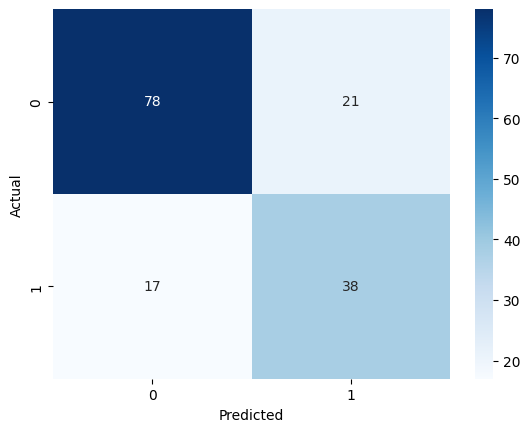

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Cross-Validation
cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

Cross-validation scores: [0.76623377 0.74025974 0.75974026 0.84313725 0.76470588]
Mean cross-validation score: 0.7748153806977337


In [ ]:
new_data=pd.read_csv("/content/drive/MyDrive/diabetes.csv")

new_prediction=best_model.predict(X_test)
print(new_prediction)

[1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [ ]:
pip install joblib


In [ ]:
from joblib import dump

#saving the trained model
dump(best_model, 'Predicting_Diabetes_model.joblib')


['Predicting_Diabetes_model.joblib']

In [ ]:
from joblib import load

# Load the saved model
loaded_model = load('Predicting_Diabetes_model.joblib')

#use loaded_model to make predictions on new data
new_data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
new_data_features = new_data.drop(columns=["Outcome"], axis=1)
new_data_features = scaler.transform(new_data_features)
new_prediction = loaded_model.predict(new_data_features)
print(new_prediction)


[1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1
 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 1 0 0 0 0 0 